#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. 

Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Необходимо построить модель для такого предсказания.

**Цель:**
- Построить модель МО для предсказания значений целевой переменной `num_orders` со значением метрики *RMSE* на тестовой выборке менее 48.

**Задача:**
- Построить несколько моделей машинного обучения с разными гиперпараметрами.
- Сравнить их результаты на кросс-валидации / валидационной выборке.
- Выбрать лучшую модель и проверить на тестовых данных.
- Достичь значения метрики *RMSE* на тестовой выборке менее 48.

**План работы:**
1. Загрузка данныъ и их ресемплирование по одному часу.
2. Анализ данных.
3. Создание новых признаков.
4. Корреляционный анализ.
5. Разбить данные на выборки (тестовую - размером 10% от исходных данных). Обучить  моделей с различными гиперпараметрами. 
6. Проверить данные на тестовой выборке и сделать выводы.
7. Вывод.

**Описание данных:**  

В файле 'taxi.csv' находятся исторические данные о количестве заказов:
- `num_orders` - количество заказов
- `datetime` - дата, время

**Целевой признак:**
- `num_orders` - количество заказов в час

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Подготовка</strong></a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Проверка-на-монотонность" data-toc-modified-id="Проверка-на-монотонность-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка на монотонность</a></span></li><li><span><a href="#Ресэмплирование" data-toc-modified-id="Ресэмплирование-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ресэмплирование</a></span></li><li><span><a href="#Вывод-по-1-разделу" data-toc-modified-id="Вывод-по-1-разделу-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><strong>Вывод по 1 разделу</strong></a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>Анализ</strong></a></span><ul class="toc-item"><li><span><a href="#Распределение-'num_orders'" data-toc-modified-id="Распределение-'num_orders'-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Распределение 'num_orders'</a></span></li><li><span><a href="#Скользящее-среднее" data-toc-modified-id="Скользящее-среднее-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Скользящее среднее</a></span></li><li><span><a href="#Тренды,-сезонность-и-шум" data-toc-modified-id="Тренды,-сезонность-и-шум-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Тренды, сезонность и шум</a></span></li><li><span><a href="#Сезонность" data-toc-modified-id="Сезонность-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Сезонность</a></span></li><li><span><a href="#Вывод-по-2-разделу:" data-toc-modified-id="Вывод-по-2-разделу:-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><strong>Вывод по 2 разделу:</strong></a></span></li></ul></li><li><span><a href="#Создание-новых-признаков" data-toc-modified-id="Создание-новых-признаков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Создание новых признаков</strong></a></span><ul class="toc-item"><li><span><a href="#Календарные-признаки" data-toc-modified-id="Календарные-признаки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Календарные признаки</a></span></li><li><span><a href="#Отстающие-значения" data-toc-modified-id="Отстающие-значения-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Отстающие значения</a></span></li><li><span><a href="#Скользящее-среднее:" data-toc-modified-id="Скользящее-среднее:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Скользящее среднее:</a></span></li><li><span><a href="#Удаление-строк-с-пустыми-значениями" data-toc-modified-id="Удаление-строк-с-пустыми-значениями-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Удаление строк с пустыми значениями</a></span></li><li><span><a href="#Вывод-по-3-разделу" data-toc-modified-id="Вывод-по-3-разделу-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span><strong>Вывод по 3 разделу</strong></a></span></li></ul></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>Корреляционный анализ</strong></a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>Обучение</strong></a></span><ul class="toc-item"><li><span><a href="#Разбиение-на-выборки" data-toc-modified-id="Разбиение-на-выборки-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Разбиение на выборки</a></span></li><li><span><a href="#LinearRegressor-и-DecisionTreeRegressor" data-toc-modified-id="LinearRegressor-и-DecisionTreeRegressor-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>LinearRegressor и DecisionTreeRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LightGBM-Regressor" data-toc-modified-id="LightGBM-Regressor-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>LightGBM Regressor</a></span></li><li><span><a href="#Выбор-модели" data-toc-modified-id="Выбор-модели-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Выбор модели</a></span></li><li><span><a href="#Вывод-по-4-разделу" data-toc-modified-id="Вывод-по-4-разделу-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span><strong>Вывод по 4 разделу</strong></a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><strong>Тестирование</strong></a></span><ul class="toc-item"><li><span><a href="#Результат" data-toc-modified-id="Результат-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Результат</a></span></li><li><span><a href="#Анализ-остатков:" data-toc-modified-id="Анализ-остатков:-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Анализ остатков:</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li><li><span><a href="#Визуализация-предсказанных-моделью-значений" data-toc-modified-id="Визуализация-предсказанных-моделью-значений-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Визуализация предсказанных моделью значений</a></span></li><li><span><a href="#Вывод-по-6-разделу" data-toc-modified-id="Вывод-по-6-разделу-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span><strong>Вывод по 6 разделу</strong></a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><strong>Общий вывод</strong></a></span></li>

*Перед началом работы:*

In [1]:
pip install -U scikit-learn lightgbm phik -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Импорт библиотек**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 

from statsmodels.graphics import tsaplots
from scipy import stats
from IPython.display import display

from statsmodels.tsa.seasonal import seasonal_decompose

# модули для работы с моделями:
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline

# Кодировщики, масштабировние
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder

# Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# CatBoost и LGBM
import catboost, lightgbm
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

# Метрики
from sklearn.metrics import mean_squared_error, root_mean_squared_error, make_scorer

import phik

**Константы:**

In [3]:
RANDOM_STATE = 42

**Используемые в работе функции:**

In [4]:
# Функция для отображения части датасета и информации о нем
def show_info(df):
    display(df.head())
    df.info()

## Построение графиков

# 1. Гистограмма и ящик с усами для числовых признаков
def graph(df, bins, x_name):
    f, ax = plt.subplots(1, 2)
    f.set_size_inches(20, 5)
    plt.suptitle(f'{x_name}', fontweight='bold')
    # Гистограмма:
    sns.histplot(data=df, bins=bins, color='coral', edgecolor=None, ax=ax[0])
    ax[0].set_title('Гистограмма распределения')
    ax[0].grid()
    ax[0].set_xlabel(x_name)
    ax[0].set_ylabel('частота')
    # Ящик с усами:
    ## vert=False, чтобы значения признака были по горизонтальной оси для обоих графиков
    sns.boxplot(data=df, orient='h', color='gray')
    ax[1].set_title('Ящик с усами')
    ax[1].grid()
    ax[1].set_xlabel(x_name)
    plt.show()
    
    display(pd.DataFrame(df.describe()).T)

    
# Для анализа остатков:
def make_hist(df, column, bins, p, x_name, title):
    f, ax = plt.subplots(1, 2)
    f.set_size_inches(20, 5)
    plt.suptitle(f'{p}', fontweight='bold')
    # Гистограмма:
    sns.histplot(data=df, x=column, bins=bins, color='coral', edgecolor=None, ax=ax[0])
    ax[0].set_title(f'{title}')
    ax[0].grid()
    ax[0].set_xlabel(x_name)
    ax[0].set_ylabel('частота')
    # Ящик с усами:
    ## vert=False, чтобы значения признака были по горизонтальной оси для обоих графиков
    sns.boxplot(data=df, x=column, orient='h', color='cornflowerblue')
    ax[1].set_title(f'Ящик с усами')
    ax[1].grid()
    ax[1].set_xlabel(x_name)
    plt.show()
    
# Для сравнения предсказанных и реальных тестовых значений
def build_joint_hist(y_test, y_pred, df_num, title):
    y_joint = pd.DataFrame(list(zip(y_test, y_pred)), columns=['y_test', 'y_pred'])
    make_hist(y_joint, None, 50, df_num, 'евро', title)
    display(y_joint.describe().T)

## **Подготовка**

### Загрузка данных

In [5]:
# Сразу переведем столбец с датой в формат datetime
data = pd.read_csv('C:/Я.Практикум/проекты/5_временные_ряды/taxi.csv', index_col=[0], parse_dates=[0])
show_info(data)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Датасет состоит всего из 1 столбцы:
- `num_orders`, число заказов (типа int) - **таргет** 

Индексы:
- `datetime`, дата и время (тип datetime)

26496 строк, нет пропущенных значений.

Данные по числу заказов представлены за каждые 10 минут суток.

### Проверка на монотонность

Проверим, что даты монотонны:

In [6]:
data.index.is_monotonic

True

* Все так, даты последовательны и не повторяются

Отрезок, на котором распределены данные:

In [7]:
print ('Первая дата:', data.index.min())
print ('Последняя дата:', data.index.max())
print ('Временной отрезок:', data.index.max() - data.index.min())

Первая дата: 2018-03-01 00:00:00
Последняя дата: 2018-08-31 23:50:00
Временной отрезок: 183 days 23:50:00


- всего 184 дня
- с 1 марта 2018 по 31 августа 2018

### Ресэмплирование

Проведем ресэмплирование по часу:

In [8]:
data = data.resample('1H').sum()
show_info(data)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


- Теперь число заказов представлено суммой по каждому часу.   
Длина датасета сократилась до 4416 строк.

### **Вывод по 1 разделу**

1. Изначально датасет состоял из 2 столбцов:
- `datetime`, дата и время (тип datetime)
- `num_orders`, число заказов (типа int) - **таргет**  

- 26496 строк, нет пропущенных значений.  
Данные по числу представлены за каждые 10 минут суток.  
Временной отрезок: 184 дня с 1 марта 2018 по 31 августа 2018

Столбец даты и времени поместили в индекс.

2. Проверка на монотонность показала, что данные последовательны и не повторяются.

3. Проведено ресэмплирование данных.  
Теперь число заказов приведено в виде суммы заказов по каждому часу.  
Длина датасета после ресэмплирования сократилась до 4416 строк.

## **Анализ**

### Распределение 'num_orders'

Посмотрим, как в общем виде распределяются значения в столбце 'num_orders':

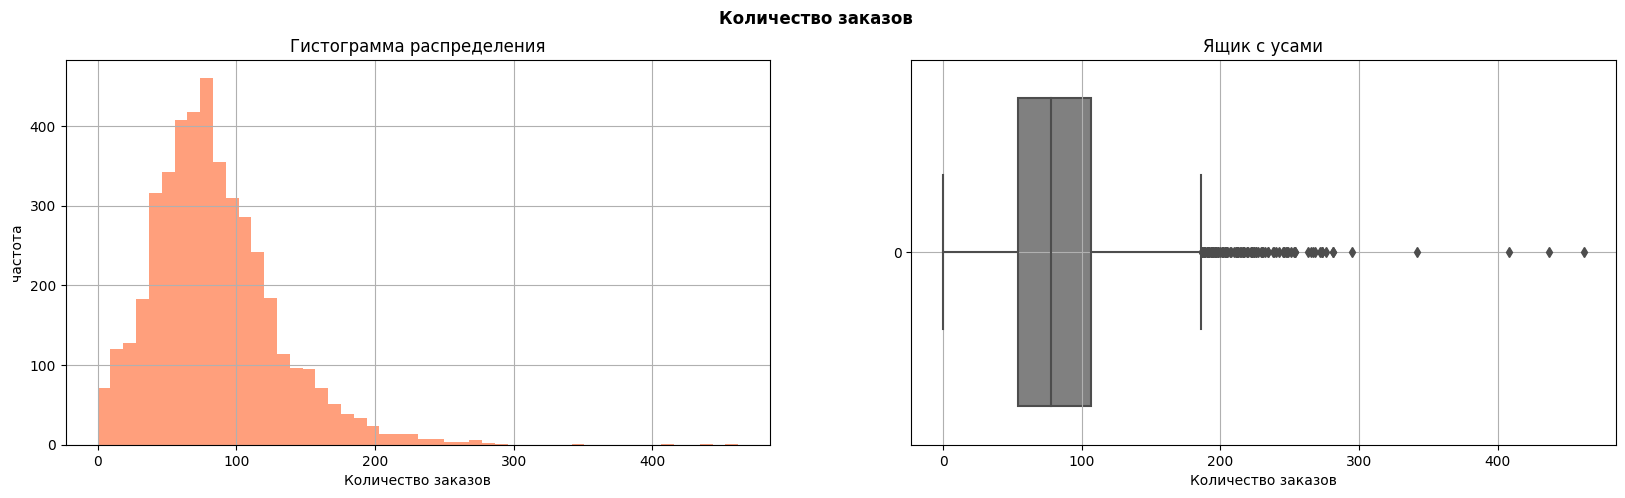

,count,mean,std,min,25%,50%,75%,max
num_orders,4416.0,84.422781,45.023853,0.0,54.0,78.0,107.0,462.0


In [9]:
graph(data['num_orders'], 50, 'Количество заказов')

- Минимальное количество заказов в час - 0.
- Максимальное количество заказов - 462.
- Медианное значение - 78.
- Среднее значение 84.4 со стандартным отклонение 45. 
- В 75% случаев количество заказов в час менее 107.
- Лишь в 25% случаев заказов было меньше 54. 
- Статистически выбросами считаются значения выше 190.   
Конечно, в нашем случае это просто редкие пиковые значения высокого количества заказов, связанных, например, с плохой погодой, праздниками и т.д. 

Посмотрим, в каком месяце чаще встречаются значения выше 200 заказов в час:

In [10]:
data.query('num_orders>200')['num_orders'].index.month

Int64Index([4, 5, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8,
            8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
            8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
            8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
           dtype='int64', name='datetime')

- В основном, в апреле. В дальнейшем этот факт может повлиять на снижение качества работы модели на тестовой выборке.

### Скользящее среднее

Построим график скользящего среднего, взяв средние значения временного ряда по неделям:

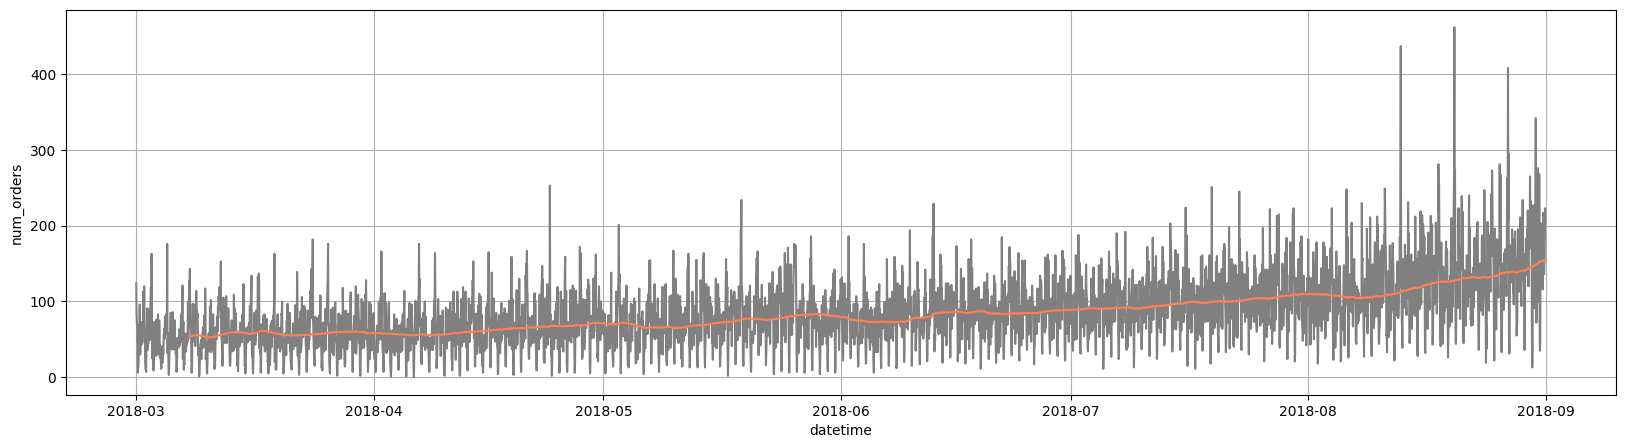

In [11]:
data['rolling_mean'] = data.rolling(24*7).mean()

f, ax = plt.subplots(1, 1)
f.set_size_inches(20, 5)
sns.lineplot(data = data, x=data.index, y='num_orders', color='gray')
sns.lineplot(data = data, x=data.index, y='rolling_mean', color='coral')
plt.title('')
plt.grid()
plt.show()

- На графике виден общий тренд по увеличению среднего количества заказов с начала марта к концу лета. Видим ускорение тренда в августе.

### Тренды, сезонность и шум

Разложим временной ряд на тренд, сезонность и остаток:

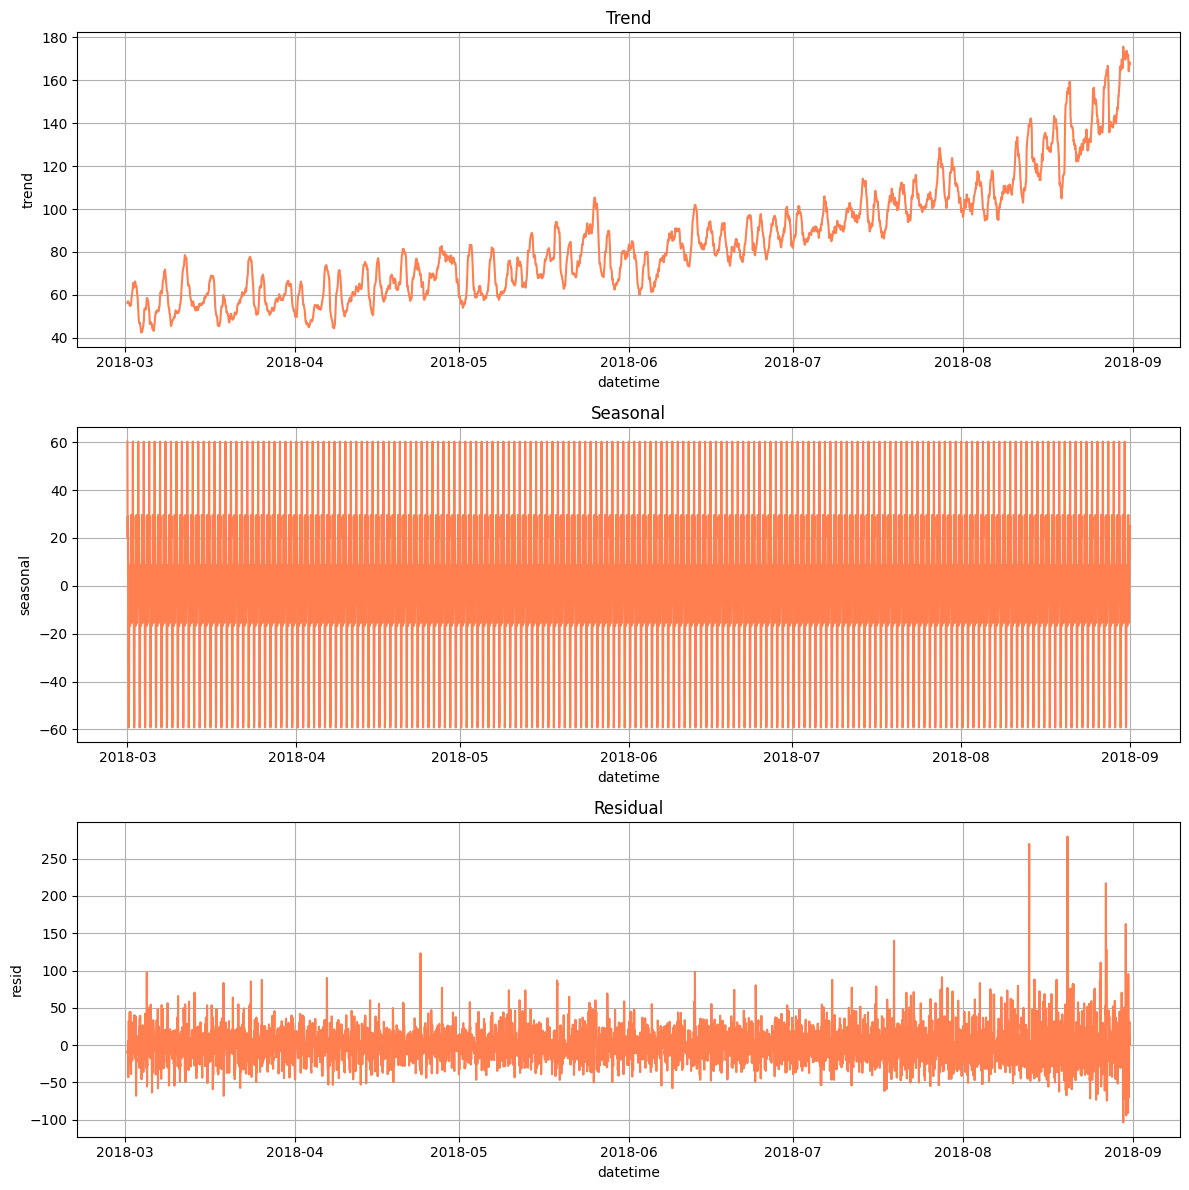

In [12]:
decomposed = seasonal_decompose(data['num_orders'])
plt.figure(figsize=(12, 12))
titles = ['Trend', 'Seasonal', 'Residual']
order = 311
p=0
for i in [decomposed.trend, decomposed.seasonal, decomposed.resid]:
    plt.subplot(order+p)
    sns.lineplot(data = i, color='coral', ax=plt.gca())
    plt.title(f'{titles[p]}')
    plt.grid()
    p+=1
plt.tight_layout()
plt.show()

**Шум:**

- Видим усиление шума и много выпадающих значений в основном в августе. Возможно, с этим связан довольно сильный скачок тренда в этом месяце.

**Сезонность:**

- Необходимо рассматривать отдельно на более коротких промежутках.

**Тренды:**

- Есть тренд на увеличение количества заказов в час, к концу лета их число выросло примерно втрое.


Посмотрим, **как менялось количество заказов через разности временного ряда**, а также проверим на нем возможные изменения стандартного отклонения:

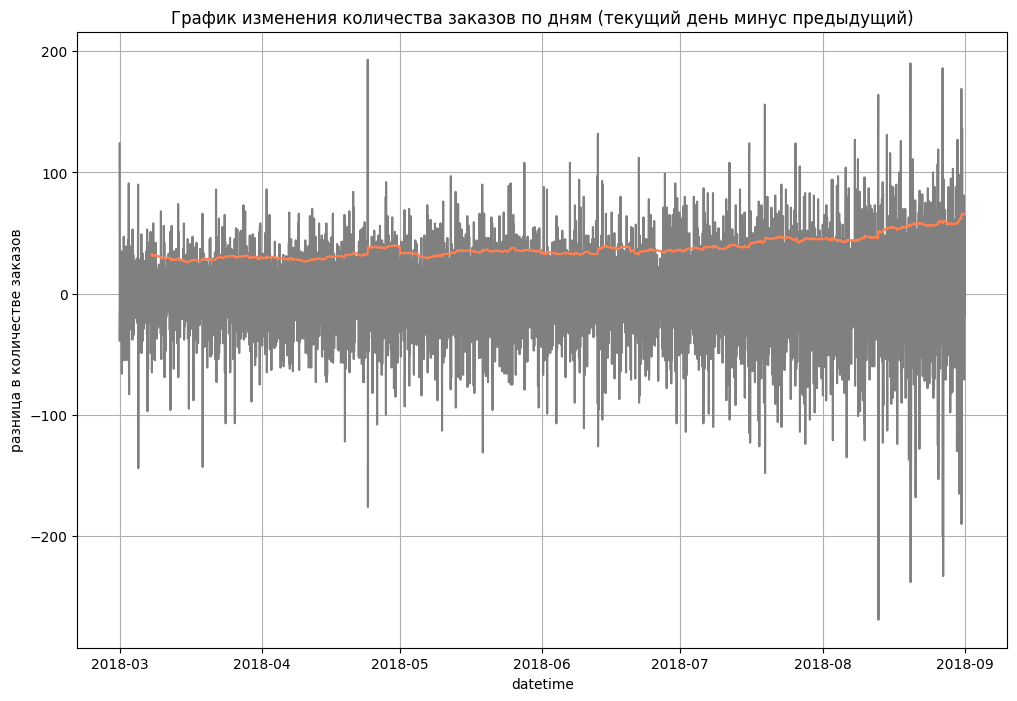

In [13]:
data_shifts = pd.DataFrame(data['num_orders'] - data['num_orders'].shift(fill_value=0))
data_shifts['std'] = data_shifts['num_orders'].rolling(24*7).std()

plt.figure(figsize=(12, 8))
sns.lineplot(data = data_shifts, x=data_shifts.index, y='num_orders', color='gray')
sns.lineplot(data = data_shifts, x=data_shifts.index, y='std', color='coral')
plt.title('График изменения количества заказов по дням (текущий день минус предыдущий)')
plt.ylabel('разница в количестве заказов')

plt.grid()
plt.show()

- Видим, что стандартное отклонение действительно увеличивается. Явный скачок видим в августе.
- Увеличение тренда по количеству заказов в августе может быть связано с тем, что в это время были сильные скачки количества заказов.

### Сезонность

Для лучшего понимания возьмем более мелкие диапазоны временного ряда и проанализируем их отдельно: по месяцу, неделе.

In [14]:
# Для удобства делаем ресэмплирование по дню
data_d = data['num_orders'].resample('1D').sum()
decomposed_d = seasonal_decompose(data_d)

**По месяцу:**

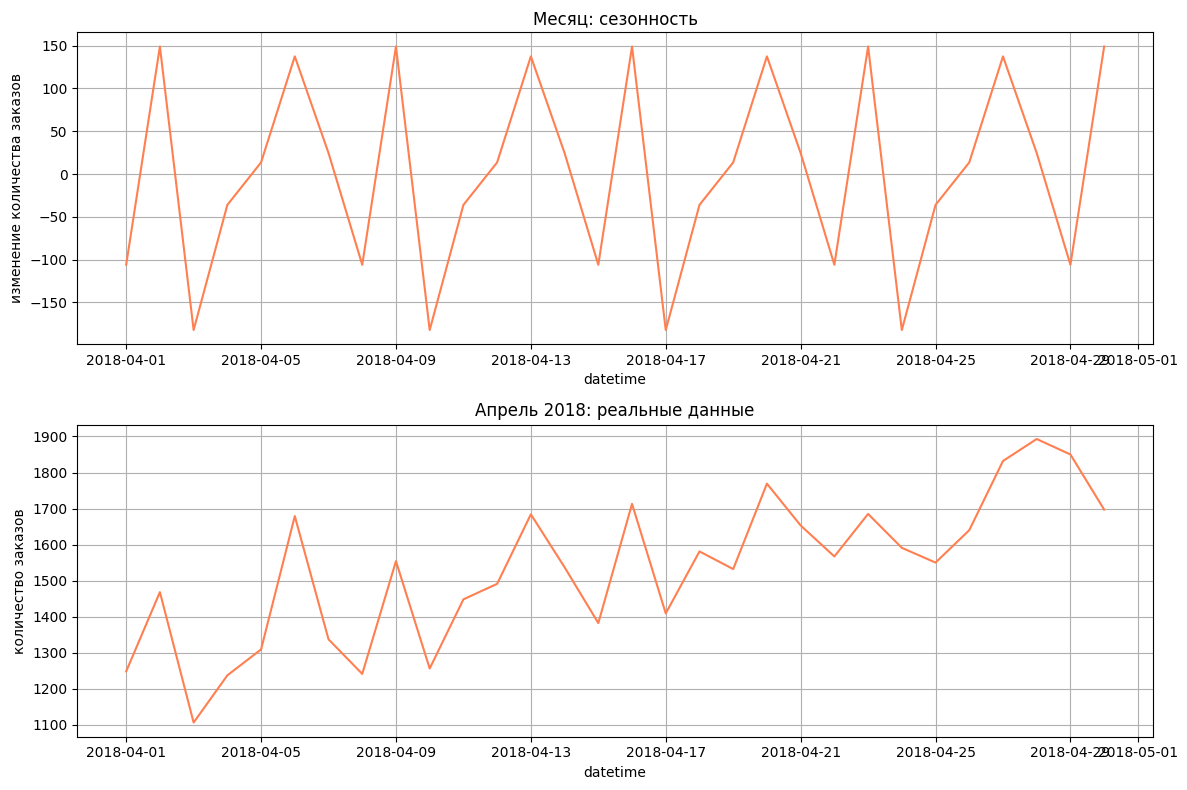

In [15]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
sns.lineplot(data = decomposed_d.seasonal['2018-04':'2018-04'], color='coral', ax=plt.gca())
plt.title('Месяц: сезонность')
plt.ylabel('изменение количества заказов')
plt.grid()

plt.subplot(212)
sns.lineplot(data = data_d['2018-04' : '2018-04'], color='coral')
plt.title('Апрель 2018: реальные данные')
plt.ylabel('количество заказов')
plt.grid()

plt.tight_layout()
plt.show()

- Видим, что есть закономерности в течение месяца. Вероятнее всего, они связаны с днями недели.
- На графике по реальным данным апреля 2018 видим примерно такие же закономерности с поправкой на тренд увеличения. 

**По неделе:**

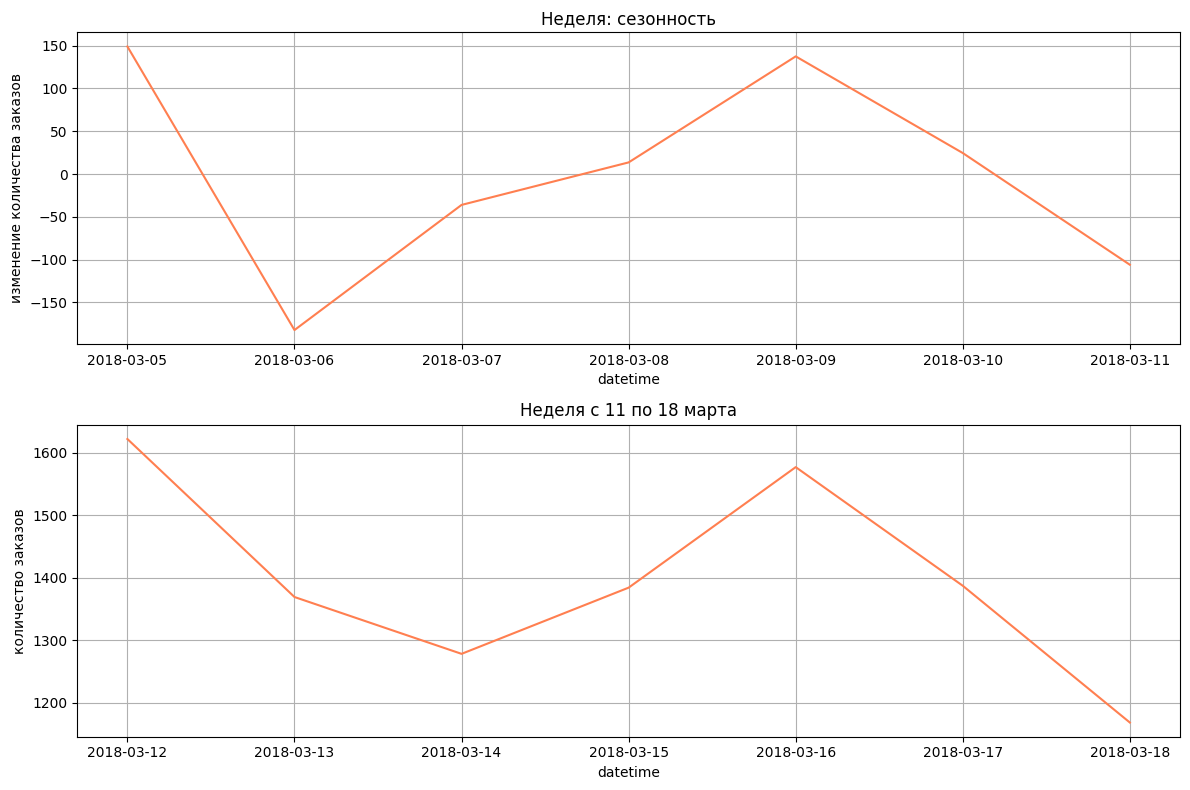

In [16]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
sns.lineplot(data = decomposed_d.seasonal['2018-03-05':'2018-03-11'], color='coral', ax=plt.gca())
plt.title('Неделя: сезонность')
plt.ylabel('изменение количества заказов')
plt.grid()


plt.subplot(212)
sns.lineplot(data = data_d['2018-03-12':'2018-03-18'], color='coral')
plt.title('Неделя с 11 по 18 марта')
plt.ylabel('количество заказов')
plt.grid()


plt.tight_layout()
plt.show()

График сезонной составляющей по неделе показывает:
- Наибольшее количество заказов такси - по понедельникам и пятницам.

1. Пик в понедельник
2. Спад во вторник
3. Постепенное увеличение количества заказов к пятнице
4. Падение на выходных

На примере реальной недели с 11 по 18 марта видим похожую ситуацию: пиковые значения в понедельник и пятницу, небольшой спад в середине недели, снижение количества заказов к воскресенью.

**По дню:**

Для графика по реальным данным возьмем рабочий день (не понедельник) и два выходных:

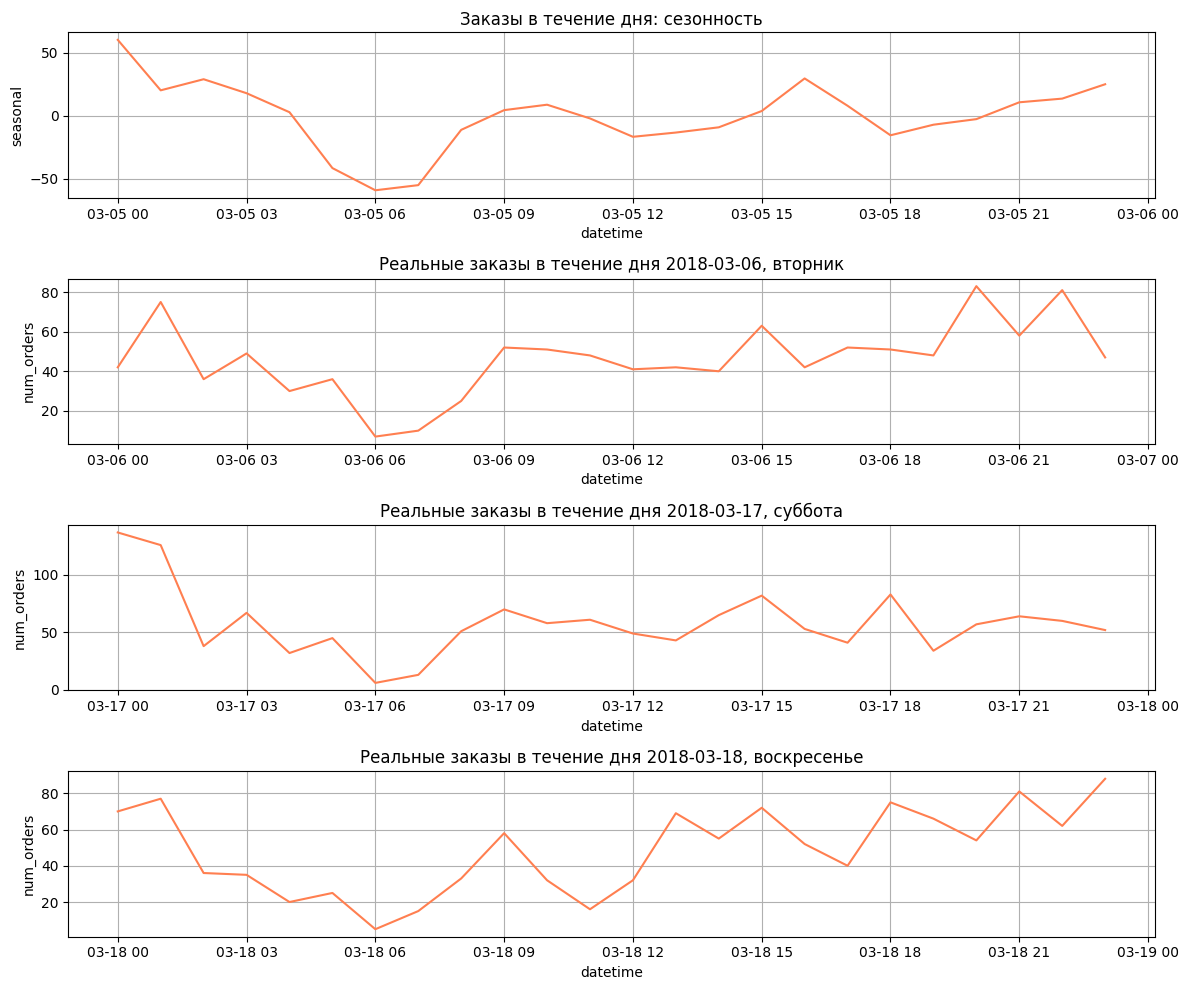

In [17]:
titles = ['Заказы в течение дня: сезонность', 'Реальные заказы в течение дня 2018-03-06, вторник', 
         'Реальные заказы в течение дня 2018-03-17, суббота','Реальные заказы в течение дня 2018-03-18, воскресенье']

plt.figure(figsize=(12, 10))
p = 0

for i in [decomposed.seasonal['2018-03-05'], data.loc['2018-03-06', 'num_orders'],
         data.loc['2018-03-17', 'num_orders'], data.loc['2018-03-18', 'num_orders']]:
    
    plt.subplot(411 + p)
    sns.lineplot(data = i, color='coral')
    plt.title(titles[p])
    plt.grid()
    p+=1


plt.tight_layout()
plt.show()

Сезонность:

Максимальное количество заказов:
- С 00:00 по 02:00

Минимальное количество:
- В 6 утра

Другие пики:
- 09:00-10:00
- 15:00-17:00
- 21:00-23:00

В выбранный вторник 6 марта видим похожую закономерность.

В выбранные выходные (сб и вс) тоже видим подобную закономерность.

### **Вывод по 2 разделу:**

Общее распределение 'num_orders':
- Минимальное количество заказов в час - 0.
- Максимальное количество заказов - 462.
- Медианное значение - 78.
- Среднее значение 84.4 со стандартным отклонение 45. 
- В 75% случаев количество заказов в час менее 107.
- Лишь в 25% случаев заказов было меньше 54. 
- Статистически выбросами считаются значения выше 190.   

**Тренд:**

- Есть тренд на увеличение количества заказов в час, к концу лета их число выросло примерно втрое.
- Увеличение тренда по количеству заказов в августе может быть связано с тем, что в это время были сильные скачки количества заказов.

**Сезонность:**

***Влияние дня недели на заказы:***
- Наибольшее количество заказов такси - по понедельникам и пятницам.
1. Пик в понедельник
2. Спад во вторник
3. Постепенное увеличение количества заказов к пятнице
4. Падение на выходных


***Зависимость от времени суток:***

Максимальное и минимальное количество заказов:
- С 00:00 по 02:00 (min), 6 утра(max)

Другие пики:
- 09:00-10:00
- 15:00-17:00
- 21:00-23:00


## **Создание новых признаков**

### Календарные признаки

Создадим признаки: день недели, день, час:

In [18]:
# Предварительно удалим ранее созданный признак, поскольку на нем предсказания делать не можем
data.drop('rolling_mean', axis=1, inplace=True)

# Добавляем новые признаки
data['day_of_the_week'] = data.index.dayofweek
data['hour'] = data.index.hour

data.head(3)

,num_orders,day_of_the_week,hour
datetime,,,
2018-03-01 00:00:00,124,3,0
2018-03-01 01:00:00,85,3,1
2018-03-01 02:00:00,71,3,2


### Отстающие значения

Построим график автокорреляции, чтобы выявить наиболее важные (коррелирующие с целевой переменной) для модели лаги:

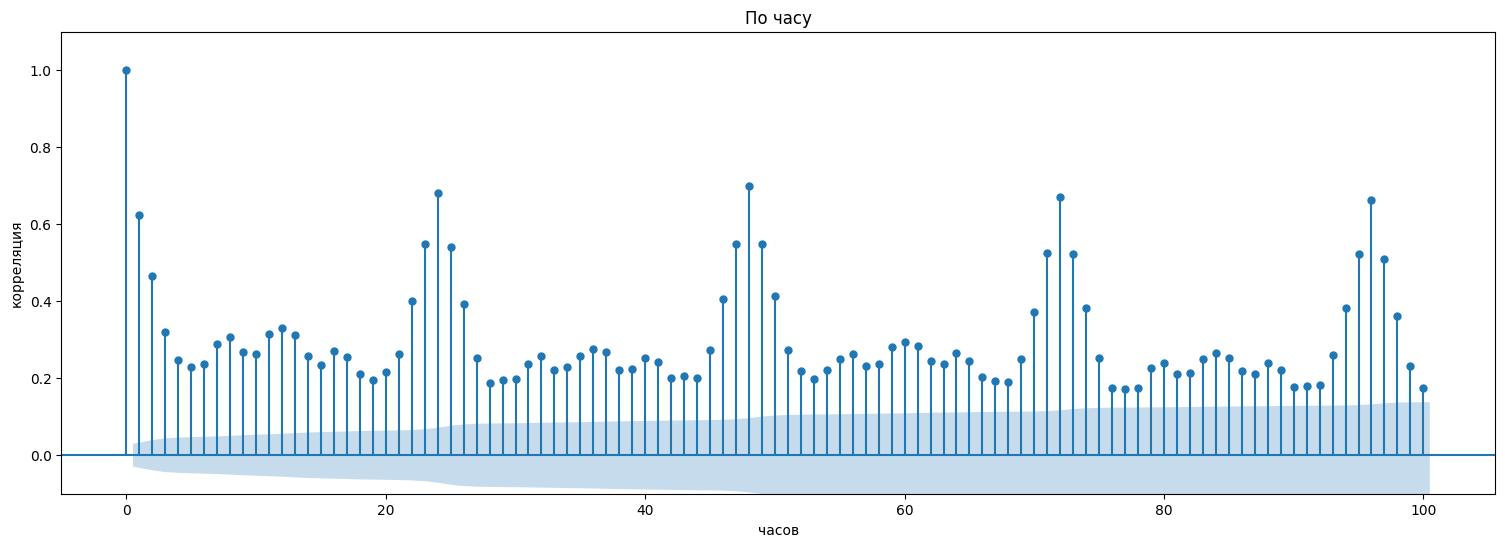

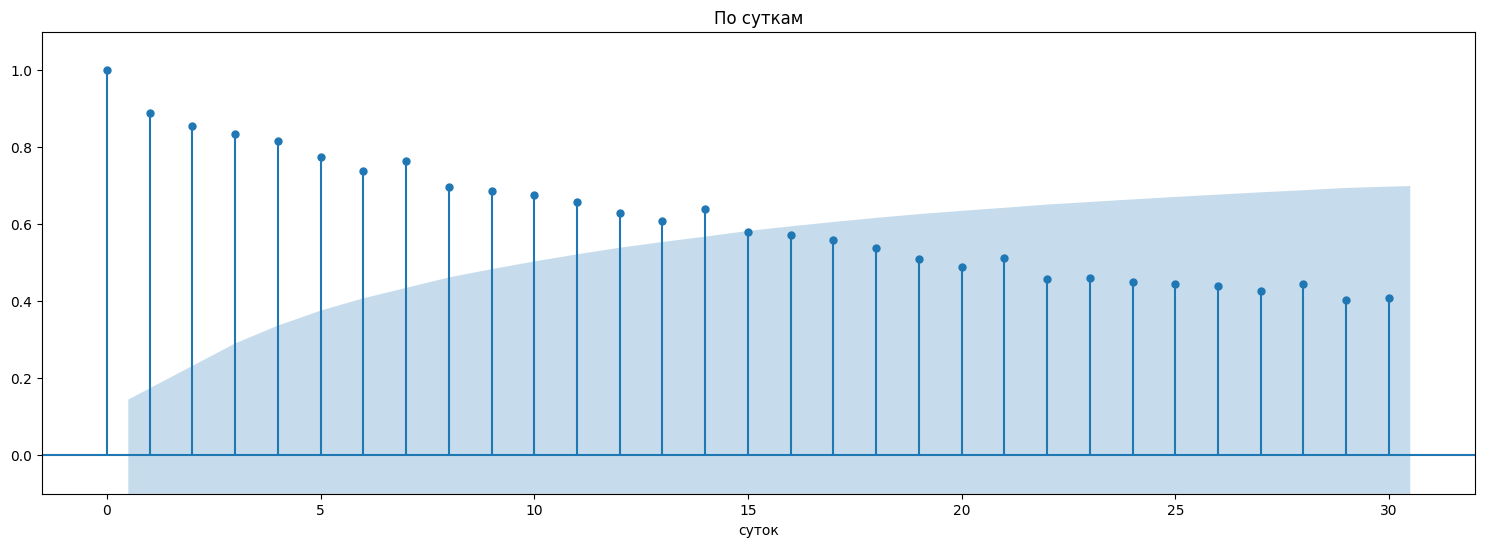

In [19]:
fig = tsaplots.plot_acf(data['num_orders'], lags=100)
fig.set_size_inches(18.5, 6)
plt.title('По часу')
plt.ylim(-.1, 1.1)
plt.ylabel('корреляция')
plt.xlabel('часов')
plt.show()

fig = tsaplots.plot_acf(data['num_orders'].resample('1D').sum(), lags=30)
fig.set_size_inches(18.5, 6)
plt.title('По суткам')
plt.ylim(-.1, 1.1)
plt.xlabel('суток')
plt.show()

1. Наиболее важными являются отстающие значения с шагом в 24 (сутки).
2. Также стоит взять первые 7 отстающих значений по суткам (24*7 часов).
- Отсутствие отрицательной корреляции указывает вновь на наличие тренда.

Создадим отстающие значения от 1 до 12 часов и от 1 до 7 суток:

In [20]:
# Значения на 12 часов назад
for i in range(12):
    data[f'lag_{i+1}_h'] = data['num_orders'].shift(i+1)

# Значения на 1-7 суток назад
for i in range(7):
    data[f'lag_{i+1}_d'] = data['num_orders'].shift(24*(i+1))
    
data.head(2)

,num_orders,day_of_the_week,hour,lag_1_h,lag_2_h,lag_3_h,lag_4_h,lag_5_h,lag_6_h,lag_7_h,...,lag_10_h,lag_11_h,lag_12_h,lag_1_d,lag_2_d,lag_3_d,lag_4_d,lag_5_d,lag_6_d,lag_7_d
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- В первых строках закономерно отсутствуют необходимые значения, поскольку для просто-напросто нет исторических данных.

### Скользящее среднее:

Сделаем признаки со средним за последние: 3 часа, 12 часов, сутки (24 часа), 3 суток (24*3 часа):

In [21]:
data['rolling_mean_1_d'] = data['lag_1_h'].rolling(24).mean()

# А также минимальное и максимальное количество заказов в час за последние сутки
data['rolling_max_1_d'] = data['lag_1_h'].rolling(24).max()
data['rolling_min_1_d'] = data['lag_1_h'].rolling(24).min()

show_info(data)

,num_orders,day_of_the_week,hour,lag_1_h,lag_2_h,lag_3_h,lag_4_h,lag_5_h,lag_6_h,lag_7_h,...,lag_1_d,lag_2_d,lag_3_d,lag_4_d,lag_5_d,lag_6_d,lag_7_d,rolling_mean_1_d,rolling_max_1_d,rolling_min_1_d
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   num_orders        4416 non-null   int64  
 1   day_of_the_week   4416 non-null   int64  
 2   hour              4416 non-null   int64  
 3   lag_1_h           4415 non-null   float64
 4   lag_2_h           4414 non-null   float64
 5   lag_3_h           4413 non-null   float64
 6   lag_4_h           4412 non-null   float64
 7   lag_5_h           4411 non-null   float64
 8   lag_6_h           4410 non-null   float64
 9   lag_7_h           4409 non-null   float64
 10  lag_8_h           4408 non-null   float64
 11  lag_9_h           4407 non-null   float64
 12  lag_10_h          4406 non-null   float64
 13  lag_11_h          4405 non-null   float64
 14  lag_12_h          4404 non-null   float64
 15  lag_1_d           4392 non-null   float64
 16

**Итог:**

- Появился 24 новых признака
- Также появились строки с пустыми значениями, необходимо будет с ними разобраться

### Удаление строк с пустыми значениями

Посмотрим максимальное количество пропусков в признаках:

In [22]:
print ('Максимальное количество пропусков в признаках:\n', data.isna().sum().max())

Максимальное количество пропусков в признаках:
 168


Процент датасета, который они составляют:

In [23]:
print ('Процент строк со значениями NaN:  ', round(data.isna().sum().max() / len(data) * 100, 1))
print ('Длина датасета: ', len(data))

Процент строк со значениями NaN:   3.8
Длина датасета:  4416


Поскольку у нас нет исторических данных, чтобы заполнить пустые значения, просто удалим все 168 признаков:

In [24]:
# Поскольку данные монотонные, а все строки с пропущенными значениями находятся в начале датасета, 
# и индекс имеем в формате datetime, использовать reset_index не требуется
data = data.dropna()
display (data.head(3))
print ('Длина датасета после удаления пропусков: ', len(data))

,num_orders,day_of_the_week,hour,lag_1_h,lag_2_h,lag_3_h,lag_4_h,lag_5_h,lag_6_h,lag_7_h,...,lag_1_d,lag_2_d,lag_3_d,lag_4_d,lag_5_d,lag_6_d,lag_7_d,rolling_mean_1_d,rolling_max_1_d,rolling_min_1_d
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-08 00:00:00,143,3,0,94.0,127.0,108.0,76.0,50.0,99.0,48.0,...,100.0,42.0,86.0,75.0,163.0,90.0,124.0,60.041667,127.0,10.0
2018-03-08 01:00:00,78,3,1,143.0,94.0,127.0,108.0,76.0,50.0,99.0,...,121.0,75.0,176.0,60.0,108.0,120.0,85.0,61.833333,143.0,10.0
2018-03-08 02:00:00,65,3,2,78.0,143.0,94.0,127.0,108.0,76.0,50.0,...,24.0,36.0,32.0,26.0,25.0,75.0,71.0,60.041667,143.0,10.0


Длина датасета после удаления пропусков:  4248


- Теперь наш датасет начинается с 8 марта 2018, на 7 дней позже

### **Вывод по 3 разделу**

Созданы:

**Календарные признаки:**
- `day_of_the_week`, `month`, `day`, `hour`

**Отстающие значения:**
- на 1, 2, 3, 6, 9 часов назад (`lag_1_h` ... `lag_9_h`)
- на 1-7 суток назад (`lag_1_d` ... `lag_7_d`)

**Скользящее среднее, для:**
- 3 часа, 12 часов (`rolling_mean_3_h`, `rolling_mean_12_h`)
- сутки, 3 суток (`rolling_mean_1_d`, `rolling_mean_3_d`)

**Значения за последние сутки:**
- минимальное количество (заказов)
- максимальное количество (заказов)

**Удалено строк:**
- 168

**Длина датасета после удаления пропусков:**
- 4248

## **Корреляционный анализ**

Построим матрицу корреляции, чтобы убедиться, что у нас нет мультиколлинеарности между входными признаками:

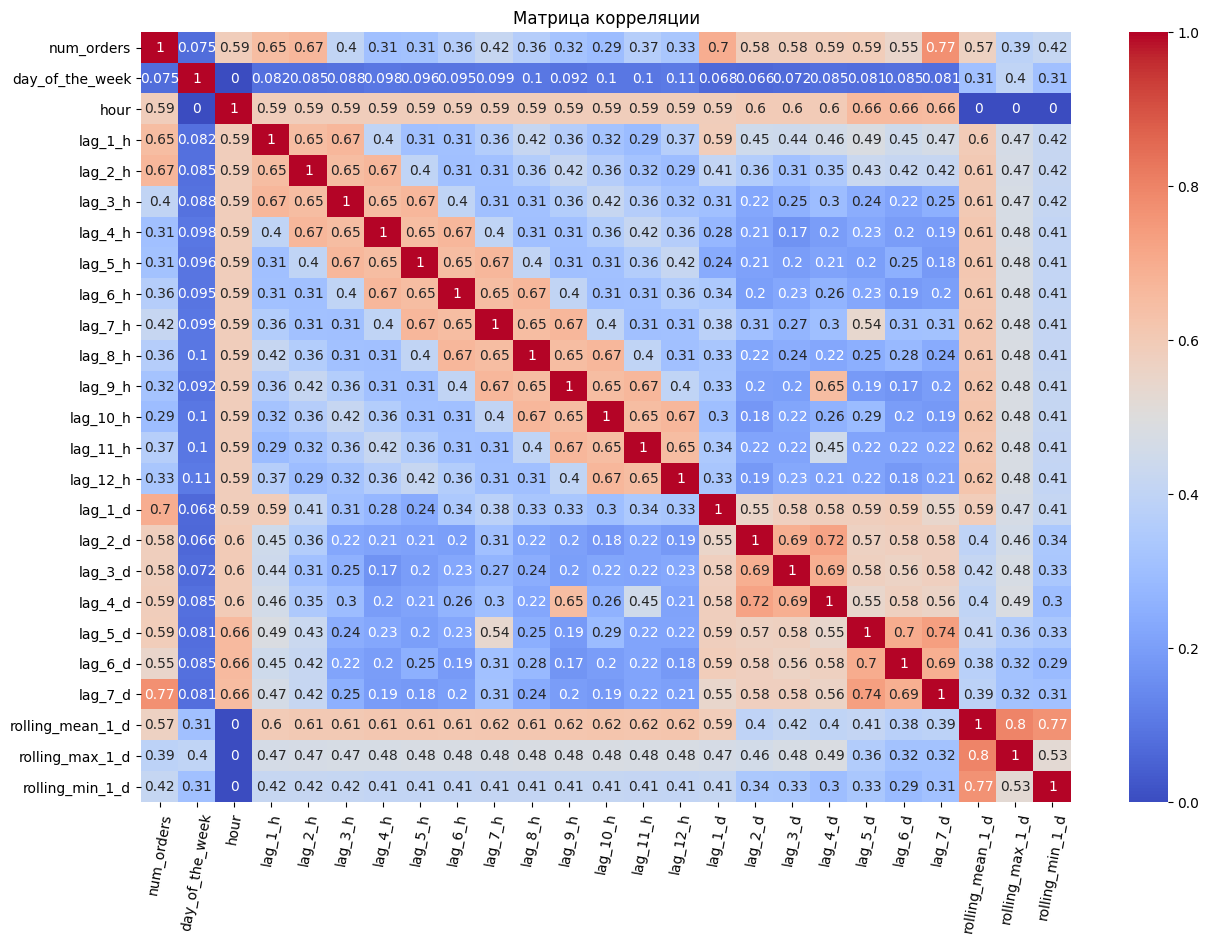

In [25]:
interval_cols = data.drop(['day_of_the_week', 'hour'], axis=1).columns

figsize = (10,10)
fig, ax = plt.subplots(figsize=(15,10))
plt.title('Матрица корреляции')
sns.heatmap(data.phik_matrix(interval_cols=interval_cols), ax=ax, annot=True, fmt='.2g', cmap='coolwarm')
plt.xticks(rotation=80)
plt.show()

**Вывод:**

- Мультиколлинеарности нет.
- Есть заметная корреляция с таргетом всех входных признаков, кроме `day_of_the_week`.

Низкая корреляция с целевым признаком признака `day_of_the_week` подтверждает то, что увидели в п. 2.4:
- Распределение заказов по часам в течение дня не зависит от дня недели, не важно - выходной или будний день.

## **Обучение**

### Разбиение на выборки

Входные признаки и таргет:

In [26]:
X = data.drop('num_orders', axis=1)
y = data['num_orders']

Разбиваем на тренировочную и тестовую выборки в соотношении 90:10

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

for i in [X_train, X_test, y_train, y_test]:
    print (f'shape {i.shape} \n min {i.index.min()} \n max {i.index.max()}\n')

shape (3823, 24) 
 min 2018-03-08 00:00:00 
 max 2018-08-14 06:00:00

shape (425, 24) 
 min 2018-08-14 07:00:00 
 max 2018-08-31 23:00:00

shape (3823,) 
 min 2018-03-08 00:00:00 
 max 2018-08-14 06:00:00

shape (425,) 
 min 2018-08-14 07:00:00 
 max 2018-08-31 23:00:00



Данные разбиты на выборки верно:
- размерности X и y совпадают
- максимальные индексы тренировочных выборок меньше минимальных индексов тестовых выборок

Обучаться модели будут на данных от получночи 8 марта до 6:00 14 августа.

Предсказания будем делать для промежутка от 7:00 14 августа по 23:00 31 августа.

### LinearRegressor и DecisionTreeRegressor

Обучим и оценим модели при помощи кросс-валидации с перебором гиперпараметров через GridSearch:

In [28]:
pipe = Pipeline([('models', LinearRegression())])

param_grid = [
    {'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
     'models__max_depth': range(3, 20), 'models__max_features': range(3, 25)},
    {'models': [LinearRegression()]} 
]

# Создадим RMSE в качестве пользовательской метрики, чтобы подсчет в переборе происходил сразу по ней
rmse = make_scorer(root_mean_squared_error, greater_is_better=False)

# В cv указываем TimeSeriesSplit, чтобы данные разбивались на подвыборки не перемешиваясь, по временным периодам
grid_search = GridSearchCV(pipe, param_grid, cv=TimeSeriesSplit(n_splits=3), scoring=rmse, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Сохраняем лучшую модель и таблицу с результатами
lr_best_model = grid_search.best_estimator_
grid_results = pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False)

# Сохраняем среднее время обучения, предсказания и значения метрики лучшей модели
lr_best = grid_results[['mean_fit_time', 'mean_score_time', 'mean_test_score']].head(1)

Смотрим результаты:

In [29]:
print ('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print ('\nМетрика лучшей модели при кросс-валидации:\n', round(-grid_search.best_score_, 2))

Лучшая модель и её параметры:

 Pipeline(steps=[('models', LinearRegression())])

Метрика лучшей модели при кросс-валидации:
 22.92


- Лучшей оказалась модель LinearRegressor. Результат RMSE на кросс-валидации хороший - 22.92.

Посмотрим также результаты других моделей, а также сравним время обучения и предсказания:

In [30]:
print ('5 лучших моделей и их значения метрики:')

display(
    grid_results[['param_models', 'param_models__max_depth', 'param_models__max_features', 
                  'mean_fit_time', 'mean_score_time', 'mean_test_score']]
    .sort_values(by='mean_test_score', ascending=False).head())

5 лучших моделей и их значения метрики:


,param_models,param_models__max_depth,param_models__max_features,mean_fit_time,mean_score_time,mean_test_score
374,LinearRegression(),NaN,NaN,0.029627,0.011304,-22.923961
58,DecisionTreeRegressor(random_state=42),5.0,17.0,0.044214,0.011305,-26.341509
29,DecisionTreeRegressor(random_state=42),4.0,10.0,0.030229,0.010640,-26.476920
31,DecisionTreeRegressor(random_state=42),4.0,12.0,0.038033,0.020944,-26.501525
55,DecisionTreeRegressor(random_state=42),5.0,14.0,0.039894,0.010304,-26.509802


1. Скорости обучения и предсказания везде высокие, менее секунды.
2. Модель DecisionTreeRegressor с разными гиперпараметрами показала себя чуть хуже на кросс-валидации: 
    - RMSE=26.34 против 22.92 у LinearRegressor.

**Итог:**

LinearRegressor.  
Результаты при кросс-валидации:
- RMSE = 22.92
- Скорости обучения и предсказания менее секунды.

DecisionTreeRegressor.
Лучшие результат при гиперпараметрах [max_features=17, max_depth=5]:
- RMSE = 26.34
- Скорости обучения и предсказания менее секунды.

В дальнейшем при выборе модели сразу будем рассматривать только LinearRegression из этих двух.

### CatBoostRegressor

Посмотрим результаты кросс-валидации при разных гиперпараметрах:

In [31]:
pipe = Pipeline([('models', CatBoostRegressor(loss_function='RMSE', silent=True))])

param_grid = [
    {'models__learning_rate': [0.03, 0.3, 0.4, 0.5],
     'models__iterations': [50, 100]} 
]

rmse = make_scorer(root_mean_squared_error, greater_is_better=False)

# В cv указываем TimeSeriesSplit, чтобы данные разбивались на подвыборки не перемешиваясь, по временным периодам
cb_search = GridSearchCV(pipe, 
                              param_grid, 
                              cv=TimeSeriesSplit(n_splits=3),
                              scoring=rmse, 
                              n_jobs=-1)
cb_search.fit(X_train, y_train)

# Сохраняем лучшую модель и таблицу с результатами
cb_best_model = cb_search.best_estimator_
cb_search_results = pd.DataFrame(cb_search.cv_results_).sort_values(by='mean_test_score', ascending=False)

cb_best = cb_search_results[['mean_fit_time', 'mean_score_time', 'mean_test_score']].head(1)

In [32]:
display (cb_search_results[
    ['param_models__iterations', 'param_models__learning_rate', 'mean_fit_time', 'mean_score_time', 'mean_test_score']
].sort_values(by='mean_test_score', ascending=False).head())

print ('Лучшая модель и её параметры:\n\n', cb_search.best_estimator_)
print ('\nМетрика лучшей модели при кросс-валидации:\n', round(-cb_search.best_score_, 2))

,param_models__iterations,param_models__learning_rate,mean_fit_time,mean_score_time,mean_test_score
1,50,0.30,2.093286,0.020286,-23.537833
4,100,0.03,4.868748,0.014900,-23.544521
5,100,0.30,3.503223,0.018969,-23.843356
2,50,0.40,2.249020,0.023607,-24.017808
6,100,0.40,3.124038,0.011755,-24.373295


Лучшая модель и её параметры:

 Pipeline(steps=[('models',
                 <catboost.core.CatBoostRegressor object at 0x0000019446E318B0>)])

Метрика лучшей модели при кросс-валидации:
 23.54


**Итог:**

При различных значениях шага `learning_rate` и количестве итераций `iterations` лучший результат получили такой:
- Гиперпараметры: iterations = 50, learning_rate = 0.3
- RMSE - 23.54
- Время обучения - 1 с
- Время предсказания - меньше секунды.

Значение метрики и времени обучения хуже, чем у LinearRegressor.


### LightGBM Regressor

In [33]:
pipe = Pipeline([('models', LGBMRegressor())])

param_grid = [
    {'models__learning_rate': [0.3, 0.4],
     'models__n_estimators': [10, 30, 50]} 
]

# В cv указываем TimeSeriesSplit, чтобы данные разбивались на подвыборки не перемешиваясь, по временным периодам
lbm_search = GridSearchCV(pipe, 
                         param_grid, 
                         cv=TimeSeriesSplit(n_splits=3),
                         scoring=rmse, 
                         n_jobs=-1)
lbm_search.fit(X_train, y_train)

# Сохраняем лучшую модель и таблицу с результатами
lbm_best_model = lbm_search.best_estimator_
lbm_search_results = pd.DataFrame(lbm_search.cv_results_).sort_values(by='mean_test_score', ascending=False)

lbm_best = lbm_search_results[['mean_fit_time', 'mean_score_time', 'mean_test_score']].head(1)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4026
[LightGBM] [Info] Number of data points in the train set: 3823, number of used features: 24
[LightGBM] [Info] Start training from score 79.561601


In [34]:
display (lbm_search_results[
    ['param_models__learning_rate', 'param_models__n_estimators', 'mean_fit_time', 'mean_score_time', 'mean_test_score']
].sort_values(by='mean_test_score', ascending=False).head())

print ('Лучшая модель LGBM и её параметры:\n\n', lbm_search.best_estimator_)
print ('\nМетрика лучшей модели при кросс-валидации:\n', round(-lbm_search.best_score_, 2))

,param_models__learning_rate,param_models__n_estimators,mean_fit_time,mean_score_time,mean_test_score
0,0.3,10,0.597193,0.015608,-24.063520
1,0.3,30,0.837430,0.014957,-24.490966
3,0.4,10,0.152923,0.011969,-24.617964
2,0.3,50,0.722580,0.016367,-24.752010
4,0.4,30,0.303284,0.013012,-25.240094


Лучшая модель LGBM и её параметры:

 Pipeline(steps=[('models', LGBMRegressor(learning_rate=0.3, n_estimators=10))])

Метрика лучшей модели при кросс-валидации:
 24.06


**Итог:**

Лучшей моделью оказалась модель со следующими гиперпараметрами:
- learning_rate=0.3, n_estimators=10

RMSE лучшей модели:
- 24.06

Время обучения и предсказания:
- 0.1 и 0.03 соответственно

### Выбор модели

Сравним значения лучших моделей:

In [35]:
names = ['LinearRegressor', 'CatBoostRegressor', 'LightGBM Regressor']
p=0
for i in [lr_best, cb_best, lbm_best]:
    print (f'\n{names[p]}:')
    display(i)
    p+=1


LinearRegressor:


,mean_fit_time,mean_score_time,mean_test_score
374,0.029627,0.011304,-22.923961



CatBoostRegressor:


,mean_fit_time,mean_score_time,mean_test_score
1,2.093286,0.020286,-23.537833



LightGBM Regressor:


,mean_fit_time,mean_score_time,mean_test_score
0,0.597193,0.015608,-24.06352


**Вывод:**

Значения метрик RMSE всех моделей оказались довольно близкими друг к другу. Лучшее - у модели LinearRegressor.

Также все модели оказались довольно быстрыми в обучении. Время предсказания каждой - меньше секунды.  
Тем не менее, самая высокая скорость обучения у LinearRegressor. В дальнейшем при увеличении количества строк в датасете этот фактор может положительно сказаться на быстродействии в работе модели.
_____
**Выбираем модель LinearRegressor по совокупности факторов**.

### **Вывод по 4 разделу**

Построено 4 модели:
- LinearRegressor, DecisionTreeRegressor, CatBoostRegressor, LightGBM Regressor.

Для каждой (кроме LinearRegressor) перебрали гиперпараметры.  
Лучшие модели определены значением RMSE при кросс-валидации (3 подвыборки, разделены с помощью TimeSeriesSplit, чтобы данные в них не перемешиваясь, были распределены по временным периодам)

В результате получили следующие модели:
1. LinearRegressor:
    - RMSE = 22.78. Скорости обучения и предсказания менее секунды.
2. DecisionTreeRegressor(max_features=16, max_depth=4): 
    - RMSE = 26.48. Скорости обучения и предсказания менее секунды.
3. CatBoostRegressor(iterations = 100, learning_rate = 0.03)
    - RMSE - 23.57. Время обучения - 1 с. Время предсказания - меньше секунды.
4. LGBMRegressor(learning_rate=0.3, n_estimators=10)
    - RMSE = 24.21. Время обучения и предсказания: 3.38 и 0.07 соответственно
    
**Выбранная модель:**
- **LinearRegressor**

(по совокупности факторов: лучшее значение метрики при кросс-валидации, высшие средние время обучения и предсказания при кросс-валидации)

## **Тестирование**

### Результат

Сделаем предсказания на тестовых данных с помощью выбранной модели и посчитаем RMSE:

In [37]:
# Засечем время предсказания
start = time.time()

lr_preds = lr_best_model.predict(X_test)

# Запишем время
preds_time = time.time() - start

lr_rmse = root_mean_squared_error(y_test, lr_preds)
print ('Время предсказания:', round(preds_time, 3))
print ('\n\nRMSE лучшей модели на тестовых данных: \n', round(lr_rmse, 2))

Время предсказания: 0.011


RMSE лучшей модели на тестовых данных: 
 34.14


* 34.14   
Хороший результат.

Значение метрики понизилось в сравнении с кросс-валидацией, где RMSE равнялось 22.92.

Это можно объяснить тем, что ближе к концу лета стал больше разброс в значениях num_orders (наблюдали в п.2.3) - в августе было большое количество значений целевого признака более 200 заказов в день (см п.2.1).  
Поскольку модель обучалась на более сбалансированных данных с меньшим количеством выбросов, ей не удалось качественно предсказать эти значения в тестовых данных.

### Анализ остатков:

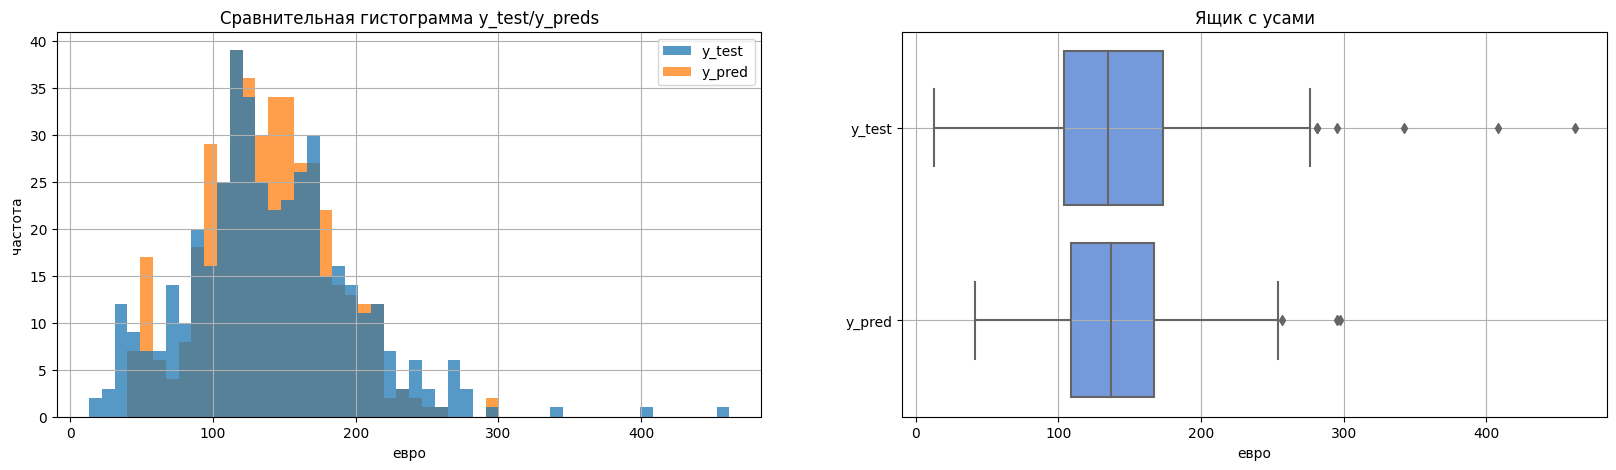

,count,mean,std,min,25%,50%,75%,max
y_test,425.0,140.087059,58.964768,13.000000,104.000000,135.000000,173.00000,462.000000
y_pred,425.0,138.068360,44.333631,41.619223,109.104647,136.488114,167.17741,297.151939


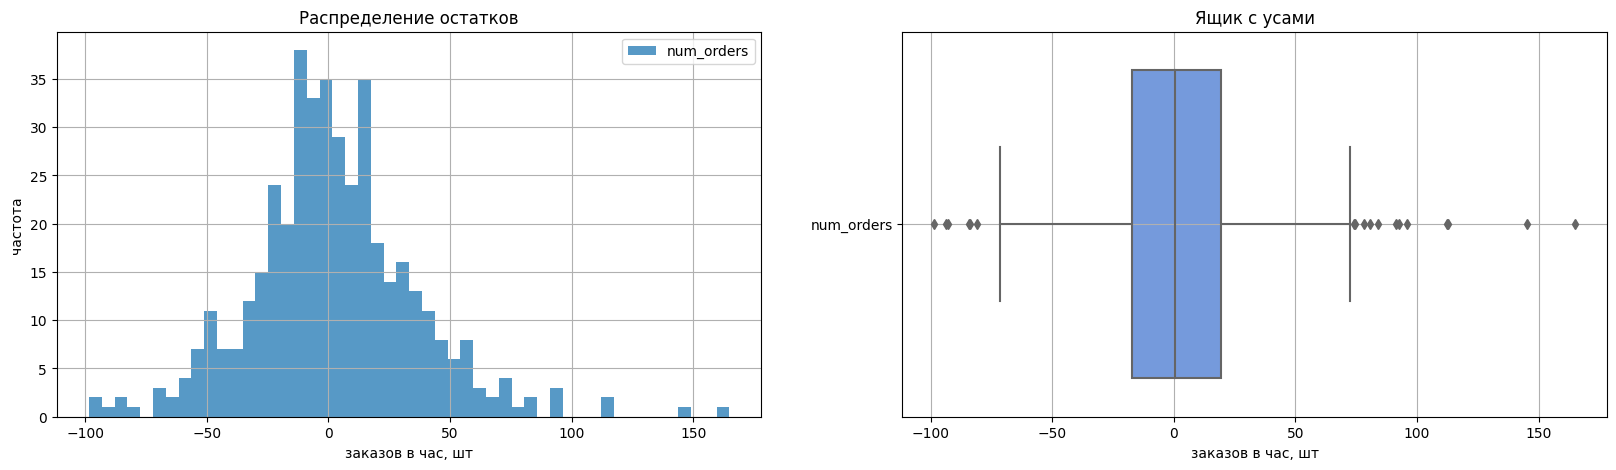

,count,mean,std,min,25%,50%,75%,max
num_orders,425.0,2.018698,34.116962,-98.432019,-17.232551,0.465879,19.190461,164.848061


In [38]:
build_joint_hist(y_test, lr_preds, '', 'Сравнительная гистограмма y_test/y_preds')
make_hist(pd.DataFrame(y_test-lr_preds), None, 50, '', 'заказов в час, шт', 'Распределение остатков')
display(pd.DataFrame(y_test-lr_preds).describe().T)

**Сравнительная гистограмма:**
- распределение значений y_test и lr_preds близко к нормальному
- сильной разницы в распределении значений тестовых и предсказанных не наблюдается

Средние предсказанных и реальных значений близки:
- 140 и 138

Медианы:
- y_test - 135, y_pred - 136

У реальных значений таргета больший размах:
- меньше минимальное значение и выше - максимальное.

Это можно объяснить тем, что видели в п.2.3:
- Ближе к концу лета (примерный диапазон значений y_test) на графике разности временного ряда наблюдали рост в изменении стандартного отклонения (были сильные скачки количества заказов).  


**Остатки:**
- среднее 2 со стандартным отклонением 34.11.
- в половине случаев ошибка модели не превышает 20.
- нормальной можем ошибку где-то от -75 до +70.


Модель *чуть чаще* занижает значения:
- Медиана сдвижена вправо (0.46)
- Среднее остатков имеет сдвиг вправо от нуля незначительный, но, вероятно, на него влияют редкие большие значения более 200 заказов/час. 


Проверим, как часто присутствуют значения таргета выше 200 и 300 :
1. в значениях таргета реальных тестовых данных
2. в предсказанных значениях

In [40]:
print (f'Значения ниже 200 в:\n y_test: {len(y_test[y_test<200])}\n lr_preds: {len(lr_preds[lr_preds<200])}')
print (f'Значения выше 200 в:\n y_test: {len(y_test[y_test>200])}\n lr_preds: {len(lr_preds[lr_preds>200])}')
print (f'Значения выше 300 в:\n y_test: {len(y_test[y_test>300])}\n lr_preds: {len(lr_preds[lr_preds>300])}')

Значения ниже 200 в:
 y_test: 368
 lr_preds: 386
Значения выше 200 в:
 y_test: 56
 lr_preds: 39
Значения выше 300 в:
 y_test: 3
 lr_preds: 0


- Значений ниже 200 больше у lr_preds. 
- Выше 200 - у y_test.
- 3 значения y_test выше 300 модель предсказать не смогла (предсказала значение меньшее)

### Проверка модели на адекватность

Сравним получившиеся результаты модели LinearRegression с результатами, которые мы получили бы, если бы модель предсказывала следующее значение предыдущим:

In [41]:
# Создаем Series с такими значениями
pred_previous = y_test.shift()
pred_previous.iloc[0] = y_train.iloc[-1]
pred_previous.head()

datetime
2018-08-14 07:00:00     45.0
2018-08-14 08:00:00     54.0
2018-08-14 09:00:00     91.0
2018-08-14 10:00:00    135.0
2018-08-14 11:00:00    155.0
Freq: H, Name: num_orders, dtype: float64

Вычисляем значение RMSE:

In [42]:
previous_method_results = round(root_mean_squared_error(y_test, pred_previous), 2)
print ('Получившийся RMSE:', previous_method_results)
print ('LinearRegression RMSE:', round(lr_rmse, 2))

Получившийся RMSE: 58.82
LinearRegression RMSE: 34.14


- Значение метрики серьезно хуже, если предсказания по каждому часу делать равным значению заказов предыдущего часа.

Значит, **наша модель работает качественно и в ней есть смысл**.

### Визуализация предсказанных моделью значений

С помощью lineplot посмотрим, по каждому частному случаю, насколько близко модель предсказывала таргет:

In [43]:
# Для удобства объединим результаты в общую таблицу
common = pd.DataFrame(lr_preds, columns=['lr_preds'])
common.index = y_test.index
common['y_test'] = y_test
common.head(1)

,lr_preds,y_test
datetime,,
2018-08-14 07:00:00,41.619223,54


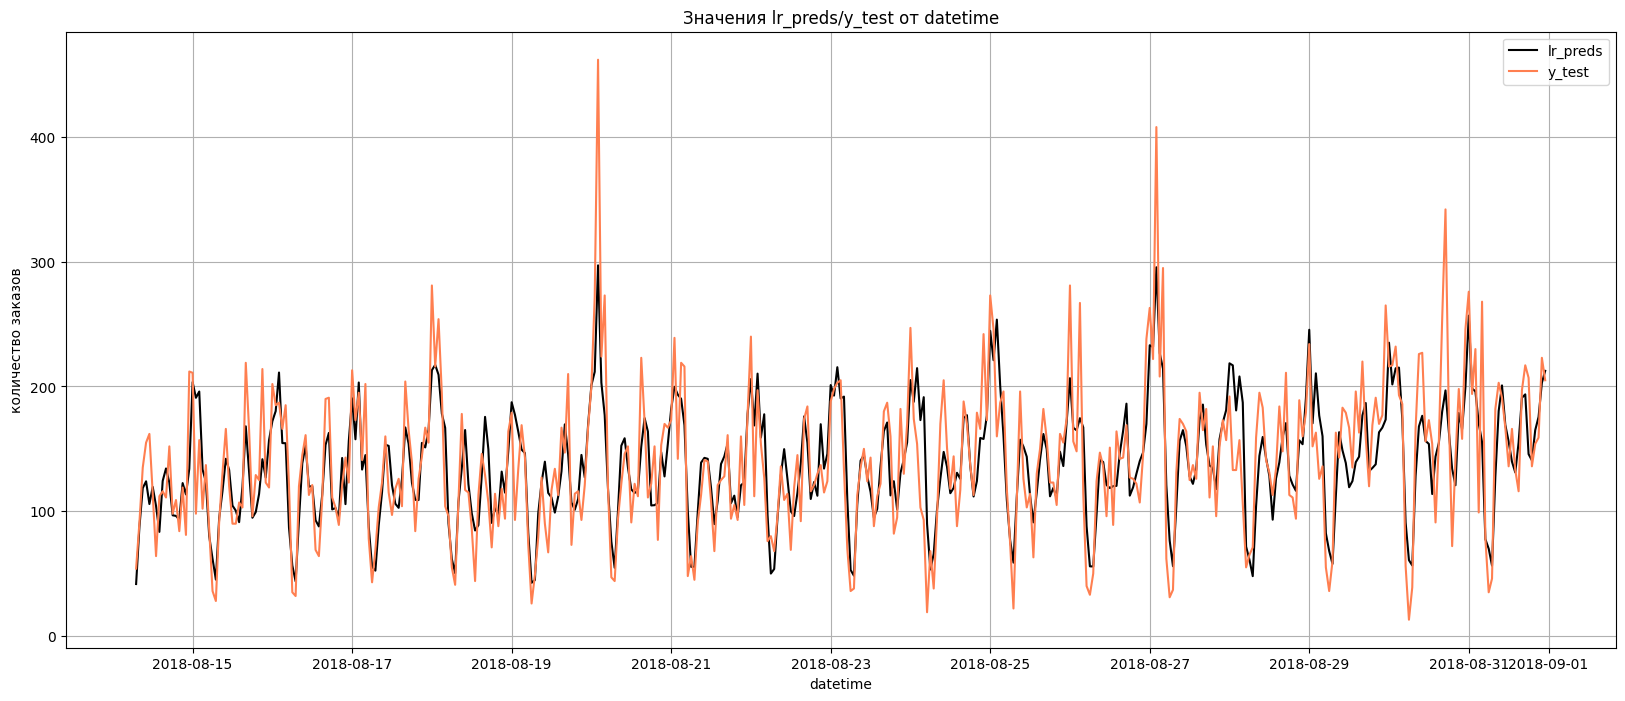

In [45]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(20, 8)
sns.lineplot(data = common, x=common.index, y='lr_preds', color='black', label='lr_preds')
sns.lineplot(data = common, x=common.index, y='y_test', color='coral', label='y_test')
plt.title('Значения lr_preds/y_test от datetime')
plt.ylabel('количество заказов')
plt.grid()
plt.show()

- В целом, модель верно определяет направление изменений. Графики располагаются довольно близко друг к другу. 

- Пиковые значения выше 300 моделью занижены на 150, 100 и 150 заказов в час.

*Модель ошибается на пиковых нагрузках, но при этом неплохо предсказывает сами эти пиковые нагрузки.*

### **Вывод по 6 разделу**

Модель LinearRegressor().

Значение метрики на тестовых данных:
- RMSE = 34.14

Время предсказания:
- менее секунды

Сравнительная гистограмма y_test/y_pred:
- Средние предсказанных и реальных значений почти равны (140 и 138)
- У реальных значений таргета больший размах

Анализ остатков:
- среднее 2 со стандартным отклонением 34.11.
- в половине случаев ошибка модели не превышает 20.
- нормальной можем ошибку где-то от -75 до +70.
- Медиана сдвижена вправо (0.46)


Значения таргета выше 200:
- Значений ниже 200 больше у lr_preds. 
- Выше 200 - у y_test.
- 3 значения y_test выше 300 модель предсказать не смогла (предсказала значение меньшее)

Проверка на адекватность:
- модель прошла проверку на адекватность

______
______

## **Общий вывод**

**Цель работы достигнута:**
- Лучшая модель - LinearRegressor. 
- RMSE на тестовых данных - 34.14 (ниже 48)

**В процессе работы:**

__

1. Подготовка

Данные проверены на монотонность. Ресэмплированы по 1 часу. Длина датасета после ресэмплирования сократилась с 26496 до 4416 строк.
  
Временной отрезок: 184 дня с 1 марта 2018 по 31 августа 2018

__  

2. Анализ

Выявлено:

Общее распределение 'num_orders': 
- Количество заказов в час распределено от 0 до 462
- Среднее значение 84.4 со стандартным отклонение 45. 
- Статистически выбросами считаются значения выше 190.   

Тренд, сезонность, шумы
- Есть тренд на увеличение количества заказов в час, к концу лета их число выросло примерно втрое.
- Увеличение тренда по количеству заказов в августе может быть связано с тем, что в это время были сильные скачки количества заказов.
- Наибольшее количество заказов такси - по понедельникам и пятницам.

Максимальное и минимальное количество заказов:
- С 00:00 по 02:00 (min), 6 утра(max)

Другие пики:
- 09:00-10:00, 15:00-17:00, 21:00-23:00

__

3. Созданы новые признаки

Календарные:
- `day_of_the_week`, `hour`

Отстающие значения:
- на 1-12 часов назад, на 1-7 суток назад

Скользящее среднее:
- сутки

Значения за последние сутки:
- минимальное и максимальное количество (заказов)

Длина датасета после удаления пропусков:
- 4248

__

4. Корреляционный анализ

Мультиколлинеарности не наблюдается. Все признаки имеют влияние на таргет (слабая/средняя/сильная корреляция)

__

5. Обучение моделей

С помощью перебора гиперпараметров, получили следующие модели с гиперпараметрами:
1. LinearRegressor:
    - RMSE = 22.9. Скорости обучения и предсказания менее секунды.
2. DecisionTreeRegressor(max_features=17, max_depth=5): 
    - RMSE = 26.34. Скорости обучения и предсказания менее секунды.
3. CatBoostRegressor(iterations = 50, learning_rate = 0.3)
    - RMSE - 23.54. Время обучения - 1 с. Время предсказания - меньше секунды.
4. LGBMRegressor(learning_rate=0.3, n_estimators=10)
    - RMSE = 24.05. Время обучения и предсказания: 3.38 и 0.07 соответственно
 
*Лучшие модели определены значением RMSE при кросс-валидации (3 подвыборки, разделены с помощью TimeSeriesSplit, чтобы данные в них не перемешиваясь, были распределены по временным периодам)*

__

6. Тестирование

Выбрана модель LinearRegression.

Значение метрики на тестовых данных:
- RMSE = 34.24